In [ ]:
#https://github.com/guilhermedom/cnn-fashion-mnist/blob/main/notebooks/1.0-gdfs-cnn-fashion-mnist.ipynb
#https://github.com/zubairsamo/Fashion-Mnist-Using-CNN

In [22]:
%pip install tensorflow
%pip install scikit-learn
%pip install scipy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.utils import resample
import matplotlib.pyplot as plt

In [23]:
from scipy.stats import t

In [10]:
# Load the MNIST Fashion dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [11]:
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape images to 3D tensors (height, width, channels)
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [12]:
# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/Users/alanzhang/Library/Python/3.10/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=2)

Epoch 1/10
1875/1875 - 24s - 13ms/step - accuracy: 0.8397 - loss: 0.4448 - val_accuracy: 0.8594 - val_loss: 0.3649
Epoch 2/10
1875/1875 - 25s - 14ms/step - accuracy: 0.8895 - loss: 0.2976 - val_accuracy: 0.8908 - val_loss: 0.2988
Epoch 3/10
1875/1875 - 24s - 13ms/step - accuracy: 0.9068 - loss: 0.2528 - val_accuracy: 0.9026 - val_loss: 0.2634
Epoch 4/10
1875/1875 - 23s - 12ms/step - accuracy: 0.9178 - loss: 0.2209 - val_accuracy: 0.9010 - val_loss: 0.2750
Epoch 5/10
1875/1875 - 25s - 13ms/step - accuracy: 0.9264 - loss: 0.1948 - val_accuracy: 0.9052 - val_loss: 0.2704
Epoch 6/10
1875/1875 - 28s - 15ms/step - accuracy: 0.9345 - loss: 0.1723 - val_accuracy: 0.9091 - val_loss: 0.2489
Epoch 7/10
1875/1875 - 25s - 14ms/step - accuracy: 0.9420 - loss: 0.1529 - val_accuracy: 0.9137 - val_loss: 0.2487
Epoch 8/10
1875/1875 - 26s - 14ms/step - accuracy: 0.9487 - loss: 0.1338 - val_accuracy: 0.9084 - val_loss: 0.2685
Epoch 9/10
1875/1875 - 23s - 12ms/step - accuracy: 0.9553 - loss: 0.1193 - val_a

In [18]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

In [30]:
# Mini-batch Bootstrap resampling for confidence interval estimation
n_iterations = 100
batch_size = 128  # Adjust batch size as needed
accuracy_results = []

for _ in range(n_iterations):
    # Randomly select indices for the mini-batch
    indices = np.random.choice(len(train_images), size=batch_size, replace=True)
    resampled_images, resampled_labels = train_images[indices], train_labels[indices]
    
    # Train model on resampled mini-batch
    model.fit(resampled_images, resampled_labels, epochs=10, verbose=0)
    
    # Evaluate model on test data
    _, acc = model.evaluate(test_images, test_labels, verbose=0)
    accuracy_results.append(acc)  # Append accuracy value to the list

# Compute confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower_confidence = max(0.0, np.percentile(accuracy_results, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper_confidence = min(1.0, np.percentile(accuracy_results, p))

print(f'95% Confidence interval for accuracy: [{lower_confidence}, {upper_confidence}]')


[35137 57839  1384 24928 16508   198 20902 26361 38352 43176 49155 13615
 30132 15625 25914 13859  5453 16261 42018 41659 55202 58721 46050 55031
 56616 19506 27880 51391 21546 29326 38395 53580  6349 54281 33387 37396
  1014  5997 42627 55175 35246 14186 45033 34494 34251 51441 48545 10732
 26622  7351  1326 40697 37680 47078 13059 51784 43389  8689 12258 50467
 11719  1473 39473  8039 51440 21691 11031 26368 34099 45772 56004 22507
 50219  4972 32224 10130 41287  9429 39565 31099  1408 24578 12952 45525
 34018 32330  8637 44371 23644 15692  4188  7810 43571  4129 34302 19131
 37021 25953 23283 43925 56517 15930 37811  1243 43538 29815 25033  1348
 14831 22670 54698 43762 43151  7853 47839 11646  9248 30553 42029 24120
 10972 18119 56256 52383 13614 19012 36618   602]
[55260 28101  3167  3394  9165 57388 24114  4539 56903 30869 32043 37340
 57150 16221  2174 30962 35614 37650 15045 41735 48832 11344  9206 41322
 56547 36113 19270 50997 16955  7270 32069 59902  6040 39522 37805 27427
 

KeyboardInterrupt: 

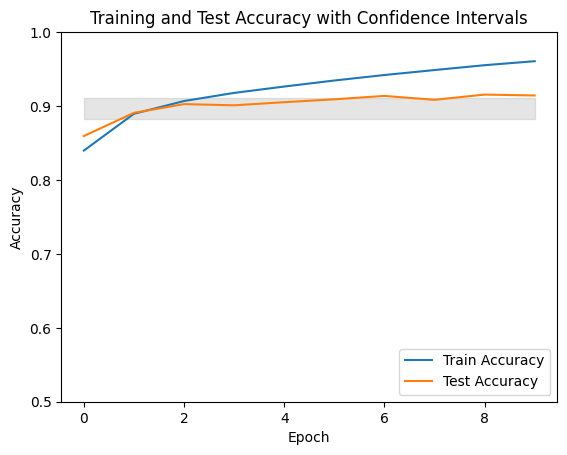

In [29]:
# Plot training and test accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Plot confidence intervals
#plt.axhline(y=test_acc, color='r', linestyle='--', label='Test Accuracy')
plt.fill_between([0, len(history.history['accuracy'])-1], lower_confidence, upper_confidence, color='gray', alpha=0.2)

plt.title('Training and Test Accuracy with Confidence Intervals')
plt.show()